In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


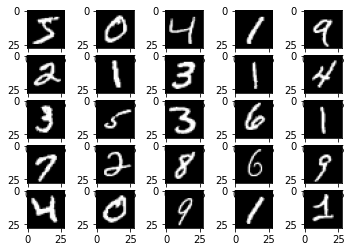

In [ ]:
# load dataset
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (X_train.shape, Y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, Y_test.shape))
# plot first few images
for i in range(25):
	# define subplot
	plt.subplot(5,5,i+1)
	# plot raw pixel data
	plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [ ]:
# Scale the data so that the values are from 0 - 1
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
# convert the 2-d matrix to a 1-d array
#X_train = X_train.reshape(-1,28,28)    #training set
#X_test = X_test.reshape(-1,28,28)      #test set

In [ ]:
# Sequential create a stack of layers
# Create a hidden layer with 100 neurons and relu activation
from keras import layers
model = keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)), 
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
    ])

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.2158 - accuracy: 0.9326
Epoch 2/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0749 - accuracy: 0.9761
Epoch 3/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0535 - accuracy: 0.9836
Epoch 4/10
1875/1875 [==============================] - 59s 32ms/step - loss: 0.0412 - accuracy: 0.9869
Epoch 5/10
1875/1875 [==============================] - 59s 32ms/step - loss: 0.0337 - accuracy: 0.9892
Epoch 6/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0265 - accuracy: 0.9918
Epoch 7/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0229 - accuracy: 0.9927
Epoch 8/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0187 - accuracy: 0.9941
Epoch 9/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0157 - accuracy: 0.9948
Epoch 10/10
1875/1875 [==============================] - 58s 31m

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 1, 1, 64)        

In [ ]:
model.evaluate(X_test, Y_test)


313/313 [==============================] - 3s 10ms/step - loss: 0.0691 - accuracy: 0.9827


[0.06912817806005478, 0.982699990272522]

# **Make the predictions**

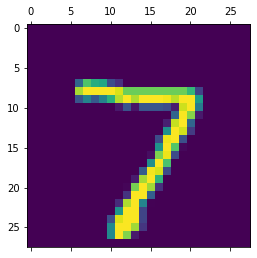

In [ ]:
# Show the image
plt.matshow(X_test[0])

In [ ]:
# Make the predictions
Y_predicted = model.predict(X_test)
Y_predicted[0]

array([2.20541901e-12, 7.35736734e-08, 2.64637379e-07, 6.94009694e-09,
       1.32128830e-09, 2.43386925e-11, 5.76710471e-15, 9.99999642e-01,
       1.07281704e-10, 1.44706958e-08], dtype=float32)

In [ ]:
# Find the maximum value using numpy
np.argmax(Y_predicted[0])

7

# ***Using confusion matrix for Using validation***

In [ ]:
Y_predicted_labels = [np.argmax(i) for i in Y_predicted]
Y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [ ]:
cm = tf.math.confusion_matrix(labels=Y_test, predictions=Y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 967,    2,    1,    0,    0,    7,    0,    3,    0,    0],
       [   0, 1134,    0,    1,    0,    0,    0,    0,    0,    0],
       [   1,    2, 1010,    5,    0,    0,    0,   14,    0,    0],
       [   0,    0,    1, 1001,    0,    5,    0,    3,    0,    0],
       [   0,    1,    1,    0,  974,    1,    0,    0,    0,    5],
       [   0,    1,    1,    3,    0,  886,    0,    1,    0,    0],
       [   3,    4,    1,    0,    2,   30,  916,    0,    2,    0],
       [   0,    5,    3,    1,    0,    0,    0, 1016,    2,    1],
       [   4,    0,    3,    5,    1,    7,    0,    1,  947,    6],
       [   5,    0,    1,    3,    4,   15,    0,    4,    1,  976]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

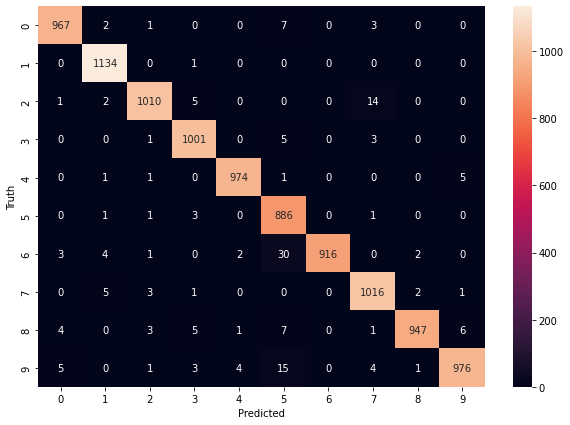

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# ***Testing by loading an image***

In [ ]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
def load_image(filename):
  # load the image
  img = load_img(filename, color_mode="grayscale", target_size=(28, 28))
  # convert to array
  img = img_to_array(img)
  # reshape into a single sample with 1 channel
  img = img.reshape(1, 28, 28, 1)
  # prepare pixel data
  img = img.astype('float32')
  img = img / 255.0
  return img
# predict the class
img1=load_image('sample_image2_1.png')
img2=load_image('sample_image2_2.png')
digit1 = np.argmax(model.predict(img1))
digit2 = np.argmax(model.predict(img2))
print(digit1,"\n",digit2)

2 
 2
